# Снижение размерности с помощью выделения признаков

### Введение
Наши наблюдения могут принимать огромное количество различных конфигураций. Это порождает проблемы, потому что наши обучающиеся <br>
алгоритмы не будут иметь достаточно данных для правильной работы. <br><br>
Не все признаки создаются равными, выделение признаков для снижения размерности имеет совершенно конкретную цель - <br>
преобразование нашего набора признаков p_исх таким образом, чтобы в конечном итоге прийти к новому набору p_нов, где p_исх > p_нов,<br>
сохраняя при этом подавляющую часть исходной информации. Мы уменьшаем количество признаков с небольшой потерей способности <br>
наших данных генерировать высококачественные предсказания.

### Снижение признаков с помощью главных компонент

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("Исходное кол-во признаков:", features.shape[1])
print("Сокращенное кол-во признаков:", features_pca.shape[1])

Исходное кол-во признаков: 64
Сокращенное кол-во признаков: 54


### Уменьшение количества признаков, когда данные линейно неразделимы

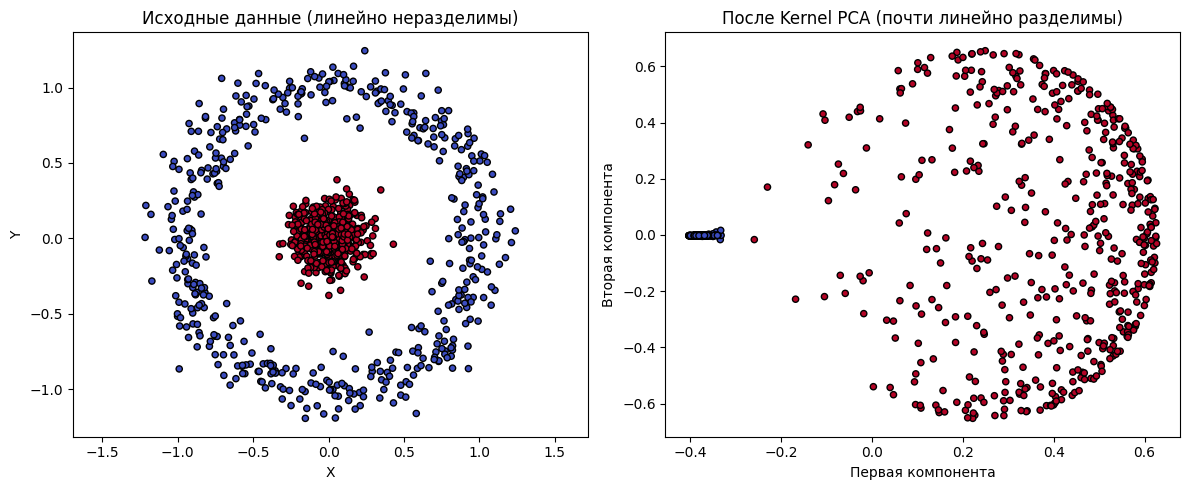

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

x, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# Применяем Kernel PCA с 2 компонентами
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=2)
x_kpca = kpca.fit_transform(x)

# Строим два графика: до и после
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Исходные данные
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
ax1.set_title("Исходные данные (линейно неразделимы)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.axis('equal')

# После Kernel PCA
ax2.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
ax2.set_title("После Kernel PCA (почти линейно разделимы)")
ax2.set_xlabel("Первая компонента")
ax2.set_ylabel("Вторая компонента")

plt.tight_layout()
plt.show()

Метод Анализа Главных Компонент (PCA) способен уменьшить размерность нашей матрицы признаков. <br>
Если данные линейно разделимы, т.е. мы можем прочертить прямую или гиперплоскость между 2 разными классами, то PCA работает хорошо. <br>
Однако, если данные не являются линейно разделимыми, мы можем разделить классы только с помощью изогнутой границы решения, <br>
линейное преобразование работать не будет. <br><br>
В готовой библиотеке make_circles круг данных находится в другом круге данных. Использовать PCA нельзя, <br>
потому что данные переплетены. <br>
Ядерный PCA способен сокращать размерности и делает данные линейно разделимыми.

### Уменьшение количества признаков с использованием разложения матрицы

Дана матрица признаков с неотрицательными значениями, и требуется уменьшить ее размерность

In [19]:
from sklearn.decomposition import NMF

digits = datasets.load_digits()
features = digits.data
nmf = NMF(n_components=10, random_state=1, max_iter=1000)
features_nmf = nmf.fit_transform(features)
print("Исходное кол-во признаков:", features.shape[1])
print("Сокращенное кол-во признаков:", features_nmf.shape[1])

Исходное кол-во признаков: 64
Сокращенное кол-во признаков: 10


Разложение неотрицательной матрицы NMF является неконтролируемым (без учителя) методом уменьшения линейной размерности, <br>
который разбивает на несколько матриц, произведение которых соответствует исходной матрице, матрицу признаков в матрицы, <br>
представляющие скрытую связь между наблюдениями и их признаками.

### Уменьшение количества признаков на разреженных данных
Дана разреженная матрица признаков, и требуется уменьшить ее размерность